<a href="https://colab.research.google.com/github/syedanida/Clustering/blob/main/documents_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Install required libraries
!pip install openai
!pip install openai scikit-learn matplotlib seaborn

In [6]:
# Import libraries
import openai
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [7]:
# Set your OpenAI API key
openai.api_key = "API-Key"

In [8]:
documents = [
    "Artificial Intelligence is transforming industries.",
    "Machine learning is a subset of AI.",
    "Deep learning requires significant computational power.",
    "Natural Language Processing enables machines to understand human language.",
    "Climate change is a pressing global issue.",
    "Renewable energy sources are crucial for sustainability.",
    "Solar power and wind energy are gaining popularity.",
    "Healthcare systems are adopting AI for better patient care.",
    "Robotics are advancing with the help of AI.",
    "Quantum computing has the potential to revolutionize industries."
]

In [25]:
!pip uninstall openai
!pip install openai==0.28

Found existing installation: openai 1.55.0
Uninstalling openai-1.55.0:
  Would remove:
    /usr/local/bin/openai
    /usr/local/lib/python3.10/dist-packages/openai-1.55.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/openai/*
Proceed (Y/n)? Y
  Successfully uninstalled openai-1.55.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.0 MB/s eta 0:00:00


In [1]:
# Import necessary libraries
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np

# Initialize a model from sentence-transformers
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight, fast model for embeddings

# Sample documents
documents = [
    "The cat sat on the mat.",
    "A dog barked at the mailman.",
    "Artificial intelligence is transforming industries.",
    "Machine learning algorithms learn from data.",
    "The quick brown fox jumps over the lazy dog.",
    "Climate change is a global challenge.",
    "Solar energy is renewable and clean.",
    "Deep learning models excel in natural language processing tasks."
]

# Generate embeddings
embeddings = model.encode(documents)
print(f"Embeddings shape: {embeddings.shape}")

# Perform clustering
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_labels = clustering_model.labels_

# Display clustered documents
clusters = {i: [] for i in range(num_clusters)}
for doc, label in zip(documents, cluster_labels):
    clusters[label].append(doc)

for cluster, docs in clusters.items():
    print(f"\nCluster {cluster}:")
    for doc in docs:
        print(f"- {doc}")


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embeddings shape: (8, 384)

Cluster 0:
- Climate change is a global challenge.
- Solar energy is renewable and clean.

Cluster 1:
- Artificial intelligence is transforming industries.
- Machine learning algorithms learn from data.
- Deep learning models excel in natural language processing tasks.

Cluster 2:
- The cat sat on the mat.
- A dog barked at the mailman.
- The quick brown fox jumps over the lazy dog.


In [2]:
# Perform KMeans clustering
def cluster_documents(embeddings, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    return labels, kmeans


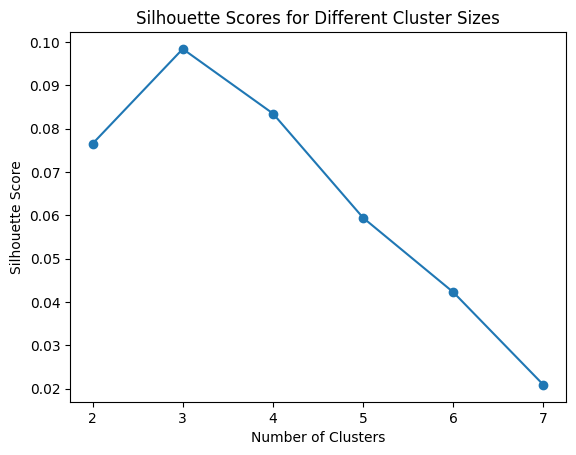

In [10]:
# Find the optimal number of clusters using the silhouette score
def find_optimal_clusters(embeddings, max_clusters):
    silhouette_scores = []
    for n_clusters in range(2, min(max_clusters + 1, len(embeddings))): # Limit clusters to len(embeddings) - 1
        _, kmeans = cluster_documents(embeddings, n_clusters)
        score = silhouette_score(embeddings, kmeans.labels_)
        silhouette_scores.append(score)
    return silhouette_scores

# Find the optimal number of clusters
max_clusters = 10
silhouette_scores = find_optimal_clusters(embeddings, max_clusters) # The max_clusters for silhouette analysis is set to 10

# Plot silhouette scores
plt.plot(range(2, min(max_clusters + 1, len(embeddings))), silhouette_scores, marker='o') # The cluster range here should match the for loop in find_optimal_clusters
plt.title("Silhouette Scores for Different Cluster Sizes")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [11]:
# Choose the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 3


In [12]:
# Cluster the documents using the optimal number of clusters
labels, kmeans = cluster_documents(embeddings, optimal_clusters)

In [13]:
# Print the clustering results
for i, label in enumerate(labels):
    print(f"Document: {documents[i]} -> Cluster: {label}")

Document: Artificial Intelligence is transforming industries. -> Cluster: 2
Document: Machine learning is a subset of AI. -> Cluster: 1
Document: Deep learning requires significant computational power. -> Cluster: 0
Document: Natural Language Processing enables machines to understand human language. -> Cluster: 0
Document: Climate change is a pressing global issue. -> Cluster: 1
Document: Renewable energy sources are crucial for sustainability. -> Cluster: 0
Document: Solar power and wind energy are gaining popularity. -> Cluster: 0
Document: Healthcare systems are adopting AI for better patient care. -> Cluster: 0
